## Getting started

In this modern world, mobile apps have become an essential part of our daily lives.

Due to tens of thousands of apps are released every month on the Google Play Store, understanding user demands is crucial for app developers and software companies to have clear orientations in creating and launching new app products to attract more users.

In this analysis, I will analyze app ratings on the Google Play Store. My goal is to understand how users interact with apps on the Google Play Store and provide valuable information for developers and software companies, because actionable insights can be drawn for developers to work on and capture the Android market.


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
import cufflinks as cf


import warnings
warnings.filterwarnings('ignore')

In [4]:

df = pd.read_csv('E:\DS\googleplaystore.csv')

#print(df.dtypes)
#df.loc[df.App=='Tiny Scanner - PDF Scanner App']
# df[df.duplicated(keep='first')]
df.drop_duplicates(subset='App', inplace=True)
df = df[df['Android Ver'] != np.nan]
df = df[df['Android Ver'] != 'NaN']
df = df[df['Installs'] != 'Free']
df = df[df['Installs'] != 'Paid']
#print(len(df))

In [5]:
print('Number of apps in the dataset : ' , len(df))
df.sample(7)

Number of apps in the dataset :  9659


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4439,Band O'Clock,LIFESTYLE,3.8,1140,746k,"100,000+",Free,0,Everyone,Lifestyle,"December 3, 2011",0.11,2.1 and up
1269,Fat Burning Workout - Home Weight lose,HEALTH_AND_FITNESS,4.5,706,9.4M,"100,000+",Free,0,Everyone,Health & Fitness,"July 24, 2018",1.0.5,4.1 and up
1919,Crossy Road,GAME,4.5,4230886,60M,"100,000,000+",Free,0,Everyone,Action,"August 1, 2018",3.1.0,5.0 and up
7290,Offline Jízdní řády CG Transit,MAPS_AND_NAVIGATION,4.6,7314,7.0M,"100,000+",Free,0,Everyone,Maps & Navigation,"September 7, 2017",3.1.4,4.0 and up
8185,Geometry Dash SubZero,GAME,4.6,260527,49M,"10,000,000+",Free,0,Everyone,Arcade,"December 21, 2017",1.00,4.0 and up
6831,Bu Hangi Ünlü?,GAME,NaN,1,19M,10+,Free,0,Everyone,Trivia,"June 9, 2018",3.3.7z,4.0.3 and up
6667,Bar BQ Night Middlesbrough,SHOPPING,NaN,0,19M,100+,Free,0,Teen,Shopping,"July 2, 2018",5.13.1,4.1 and up


## Data Cleaning
 - Convert all app sizes to MB
 - Remove '+' from 'Number of Installs' to make it numeric
 - Convert all review text to English language using Google Translator library

In [6]:

# - Installs : Remove + and ,

df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))
#print(type(df['Installs'].values))


In [7]:
# - Size : Remove 'M', Replace 'k' and divide by 10^-3
#df['Size'] = df['Size'].fillna(0)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)


df['Size'] = df['Size'].apply(lambda x: float(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

df['Reviews'] = df['Reviews'].apply(lambda x: int(x))
#df['Reviews'] = df['Reviews'].apply(lambda x: 'NaN' if int(x) == 0 else int(x))
#print(df.loc[df.Size == 0.713]) #index = 3384
#df.loc[df.col1 == '']['col2']

# 0 - Free, 1 - Paid
# df['Type'] = pd.factorize(df['Type'])[0]
#print(df.dtypes)

## Basic EDA

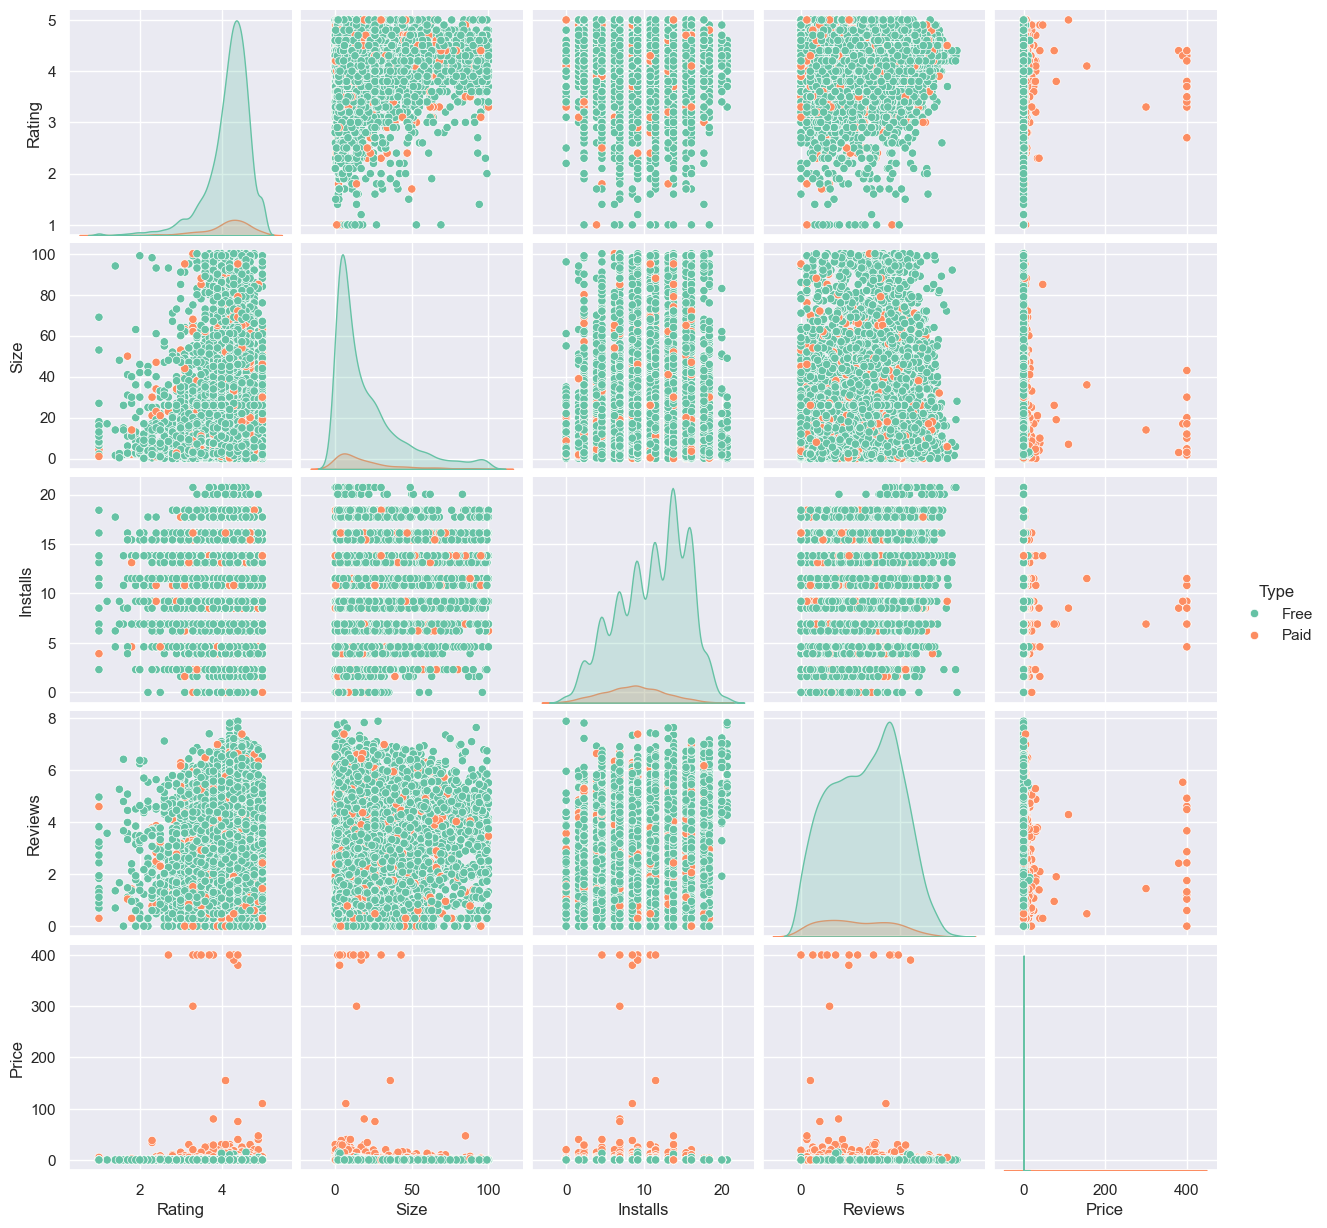

In [8]:
#print(df.dtypes)


x = df['Rating'].dropna()
y = df['Size'].dropna()
z = df['Installs'][df.Installs!=0].dropna()
p = df['Reviews'][df.Reviews!=0].dropna()
t = df['Type'].dropna()
price = df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2")

    This is the basic exploratory analysis to look for any evident patterns or relationships between the features. 

## Android market share
Which category has the highest share of (active) apps in the market?

Number of unique categories: 33
Unique categories: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


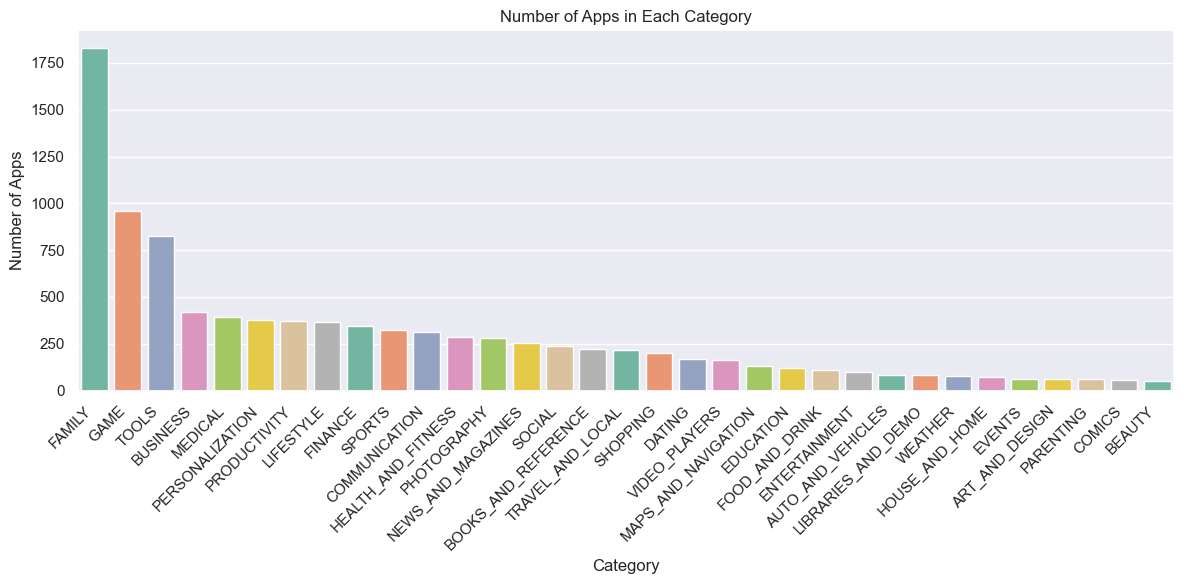

In [9]:
unique_categories = df['Category'].unique()
num_categories = len(unique_categories)

print("Number of unique categories:", num_categories)
print("Unique categories:", unique_categories)

sns.set_palette("Set2")
app_counts = df['Category'].value_counts()
palette = sns.color_palette("Set2", num_categories)

plt.figure(figsize=(12, 6))
sns.barplot(x=app_counts.index, y=app_counts.values, palette=palette)
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Number of Apps in Each Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The chart shows that the "Family" category is the most appearance for application in store with over 1,700 apps falling into this category.

Interestingly, the "Game" and "Tools" categories are also quite popular, with a significant number of apps in each category as well.

=> So, we can be easier seen that Applications in the 'Family,' 'Game,' or 'Tools' categories are highly competitive in the market.


## Average rating of apps
Do any apps perform really good or really bad?

In [10]:
data = [go.Histogram(
    x=df.Rating,
    xbins={'start': 1, 'size': 0.1, 'end': 5},
    marker=dict(color='skyblue')  # Đặt màu sắc của histogram
)]

# In trung bình đánh giá của ứng dụng
print('Average app rating = ', np.mean(df['Rating']))

# Hiển thị biểu đồ
plotly.offline.iplot(data, filename='overall_rating_distribution')


Average app rating =  4.173243045387994


Generally, most apps perform well with an average rating of 4.17.

We can see from this Rating distribution chart, only a small number of applications are rated below 2.


## App ratings across categories - One Way Anova Test

F_onewayResult(statistic=12.79263715618054, pvalue=2.323280446259348e-20)

The p-value is extremely small, hence we reject the null hypothesis in favor of the alternate hypothesis.



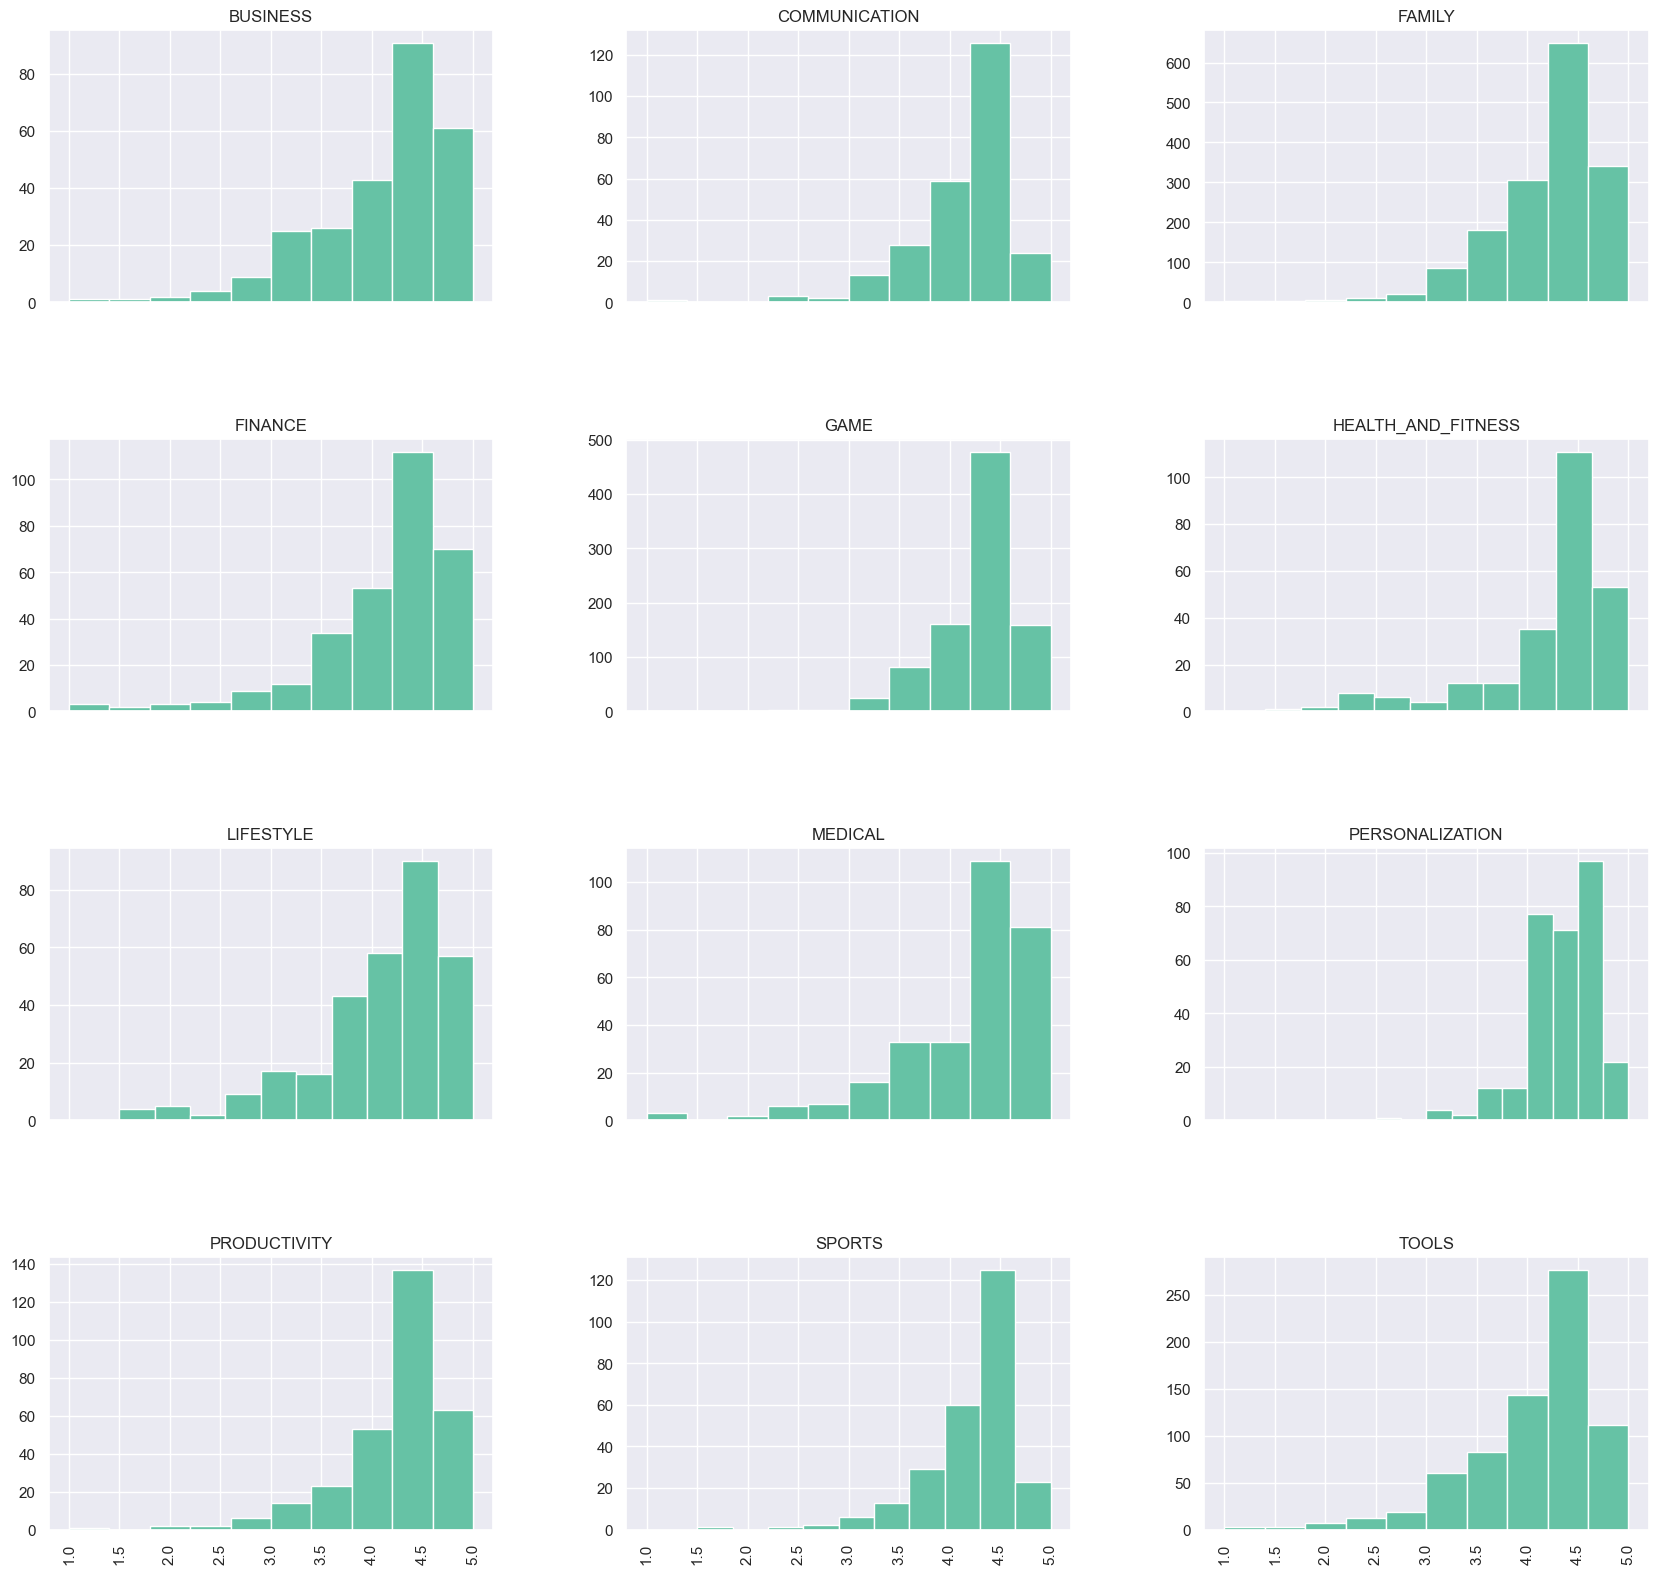

In [11]:
import scipy.stats as stats
f = stats.f_oneway(df.loc[df.Category == 'BUSINESS']['Rating'].dropna(), 
               df.loc[df.Category == 'FAMILY']['Rating'].dropna(),
               df.loc[df.Category == 'GAME']['Rating'].dropna(),
               df.loc[df.Category == 'PERSONALIZATION']['Rating'].dropna(),
               df.loc[df.Category == 'LIFESTYLE']['Rating'].dropna(),
               df.loc[df.Category == 'FINANCE']['Rating'].dropna(),
               df.loc[df.Category == 'EDUCATION']['Rating'].dropna(),
               df.loc[df.Category == 'MEDICAL']['Rating'].dropna(),
               df.loc[df.Category == 'TOOLS']['Rating'].dropna(),
               df.loc[df.Category == 'PRODUCTIVITY']['Rating'].dropna()
              )

print(f)
print('\nThe p-value is extremely small, hence we reject the null hypothesis in favor of the alternate hypothesis.\n')
#temp = df.loc[df.Category.isin(['BUSINESS', 'DATING'])]

groups = df.groupby('Category').filter(lambda x: len(x) > 286).reset_index()
array = groups['Rating'].hist(by=groups['Category'], sharex=True, figsize=(20,20))

                            The average app ratings across categories is significantly different.

## Best performing categories

In [12]:
groups = df.groupby('Category').filter(lambda x: len(x) >= 170).reset_index()
#print(type(groups.item.['BUSINESS']))
print('Average rating = ', np.nanmean(list(groups.Rating)))
#print(len(groups.loc[df.Category == 'DATING']))
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 720, len(set(groups.Category)))]


#df_sorted = df.groupby('Category').agg({'Rating':'median'}).reset_index().sort_values(by='Rating', ascending=False)
#print(df_sorted)

layout = {'title' : 'App ratings across major categories',
        'xaxis': {'tickangle':-40},
        'yaxis': {'title': 'Rating'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': [{
              'type' :'line',
              'x0': -.5,
              'y0': np.nanmean(list(groups.Rating)),
              'x1': 19,
              'y1': np.nanmean(list(groups.Rating)),
              'line': { 'dash': 'dashdot'}
          }]
          }

data = [{
    'y': df.loc[df.Category==category]['Rating'], 
    'type':'violin',
    'name' : category,
    'showlegend':False,
    #'marker': {'color': 'Set2'},
    } for i,category in enumerate(list(set(groups.Category)))]



plotly.offline.iplot({'data': data, 'layout': layout})



Average rating =  4.170026786973072


- Almost all app categories perform reasonably well. However, there are still some notable highlights:
The mean of Health and Fitness as well as Books and Reference is 4.5, so they produce the highest quality apps with 50% apps having a rating greater than 4.5. This is a very high-quality rating
- Meanwhile, the mean of Dating category is 4.1, that means 50% of apps in the Dating category have a rating lesser than the average rating. 


# Sizing Strategy - Light Vs Bulky?

How do app sizes impact the app rating?

In [13]:
groups = df.groupby('Category').filter(lambda x: len(x) >= 50).reset_index()

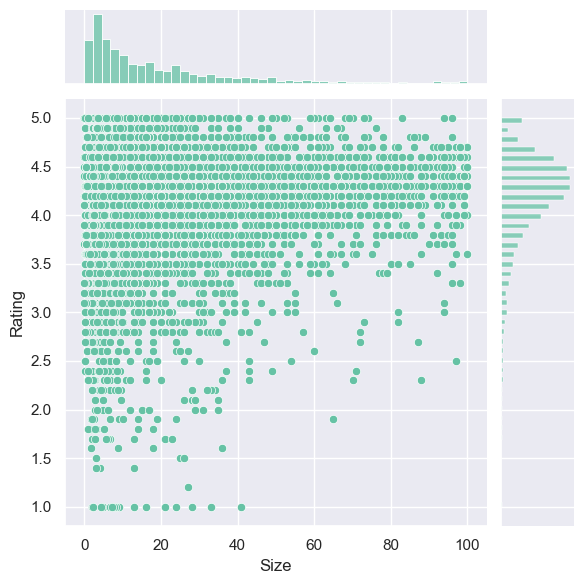

In [14]:
# Set the style
sns.set_style("darkgrid")

# Create a jointplot
joint_plot = sns.jointplot(x=df['Size'], y=df['Rating'])

# Set axis labels
joint_plot.set_axis_labels(xlabel='Size', ylabel='Rating')

# Show the plot
plt.show()

Most top rated apps are optimally sized between **~2MB to ~40MB** - neither too light nor too heavy.

In [15]:

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 720, len(set(groups.Category)))]

subset_df = df[df.Size > 40]
groups_temp = subset_df.groupby('Category').filter(lambda x: len(x) >20)

# for category in enumerate(list(set(groups_temp.Category))):
#     print (category)

data = [{
    'x': groups_temp.loc[subset_df.Category==category[1]]['Rating'], 
    'type':'scatter',
    'y' : subset_df['Size'],
    'name' : str(category[1]),
    'mode' : 'markers',
    'showlegend': True,
    #'marker': {'color':c[i]}
    #'text' : df['rating'],
    } for category in enumerate(['GAME', 'FAMILY'])]


layout = {'title':"Rating vs Size", 
          'xaxis': {'title' : 'Rating'},
          'yaxis' : {'title' : 'Size (in MB)'},
         'plot_bgcolor': 'rgb(0,0,0)'}

plotly.offline.iplot({'data': data, 'layout': layout})

# heavy_categories = [ 'ENTERTAINMENT', 'MEDICAL', 'DATING']

# data = [{
#     'x': groups.loc[df.Category==category]['Rating'], 
#     'type':'scatter',
#     'y' : df['Size'],
#     'name' : category,
#     'mode' : 'markers',
#     'showlegend': True,
#     #'text' : df['rating'],
#     } for category in heavy_categories]

Among the apps with a size larger than 40MB, Most large-sized apps belong to the Game and Family categories.

Despite this, these bulky apps are fairly highly rated indicating that they are heavy for a purpose


# Pricing Strategy - Free Vs Paid?
How do app prices impact app rating?

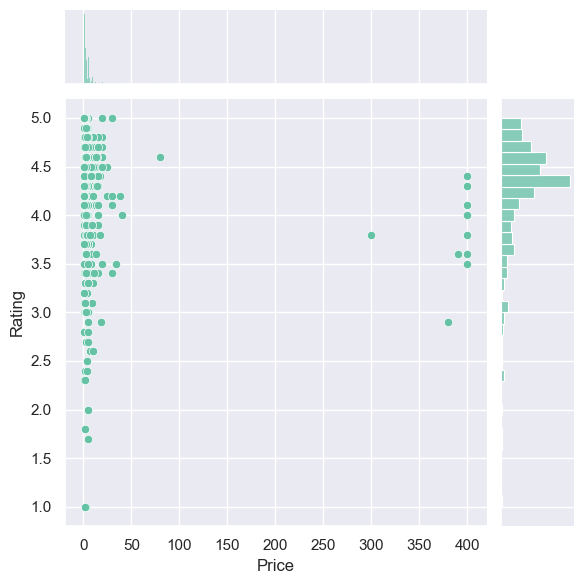

In [16]:
# Lọc dữ liệu cho các ứng dụng có giá > 0
paid_apps = df[df.Price > 0]

# Tạo biểu đồ joint plot
p = sns.jointplot(x="Price", y="Rating", data=paid_apps)

# Hiển thị biểu đồ
plt.show()

Most top rated apps are optimally priced between **~1\$ to ~30\$**. There are only a very few apps priced above 20\$.

## Current pricing trend - How to price your app?

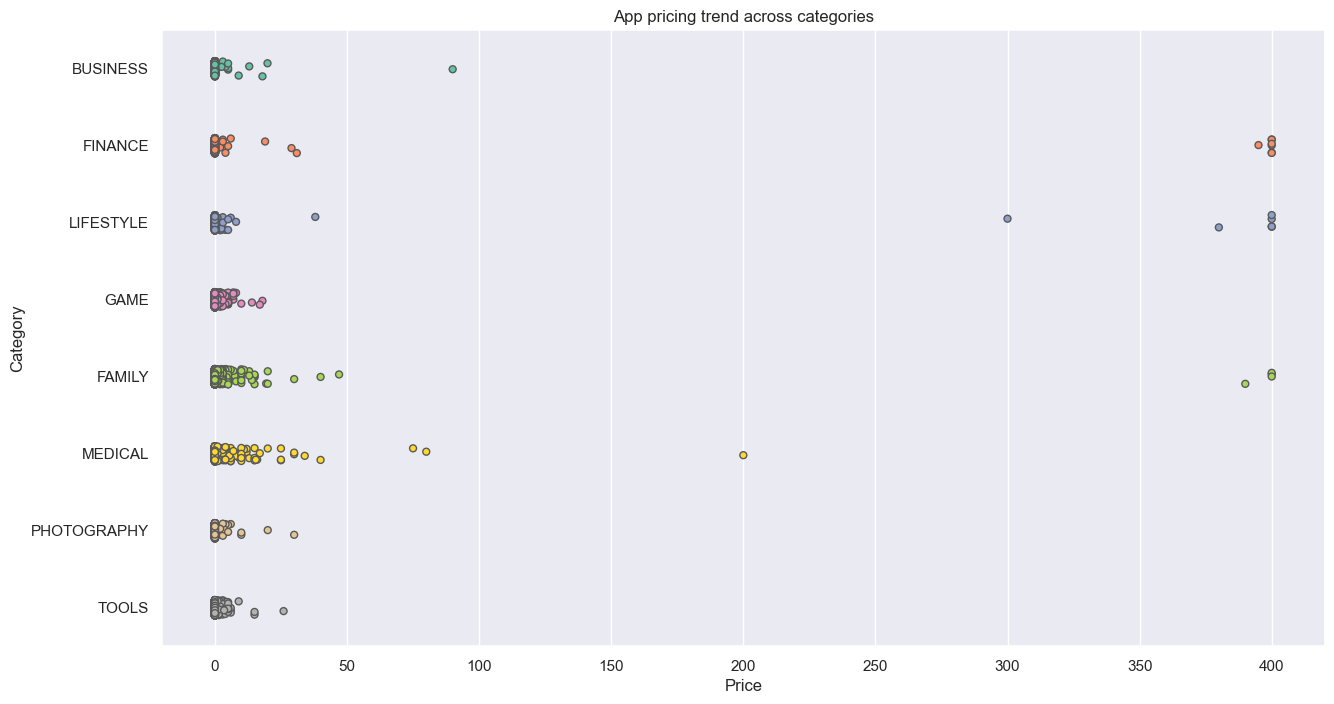

In [17]:
subset_df = df[df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE',
                                 'LIFESTYLE','BUSINESS'])]

colors = sns.color_palette("Set2", len(subset_df['Category'].unique()))
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
p = sns.stripplot(x="Price", y="Category", data=subset_df, jitter=True, linewidth=1, palette=colors)
title = ax.set_title('App pricing trend across categories')

plt.show()

With the top 8 categories with the highest frequency, while the prices of most apps tend to be below $30, there exists some apps priced more than $200 in the Finance, Lifestyle, and Family categories.


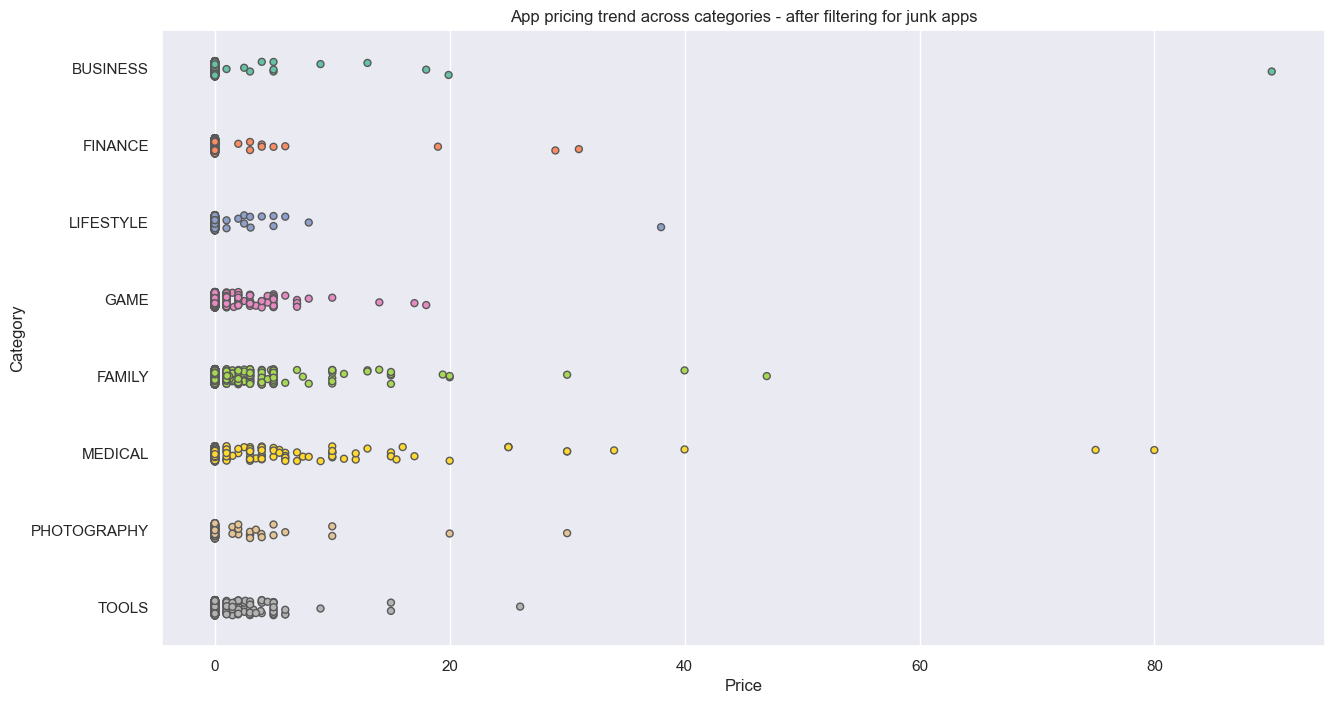

In [19]:
subset_df = df[df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE',
                                 'LIFESTYLE','BUSINESS'])]
subset_df_price = subset_df[subset_df.Price < 100]

colors = sns.color_palette("Set2", len(subset_df_price['Category'].unique()))
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

p = sns.stripplot(x="Price", y="Category", data=subset_df_price, jitter=True, linewidth=1, palette=colors)
title = ax.set_title('App pricing trend across categories - after filtering for junk apps')

plt.show()

When removing apps priced above $200, the chart look like this: 
- Almost apps are priced under 30$
- Notably, Medical and Family apps stand out as the most expensive, with some medical apps reaching up to $80
- Surprisingly, all game apps are reasonably priced below 20$.


## Distribution of paid and free apps across categories

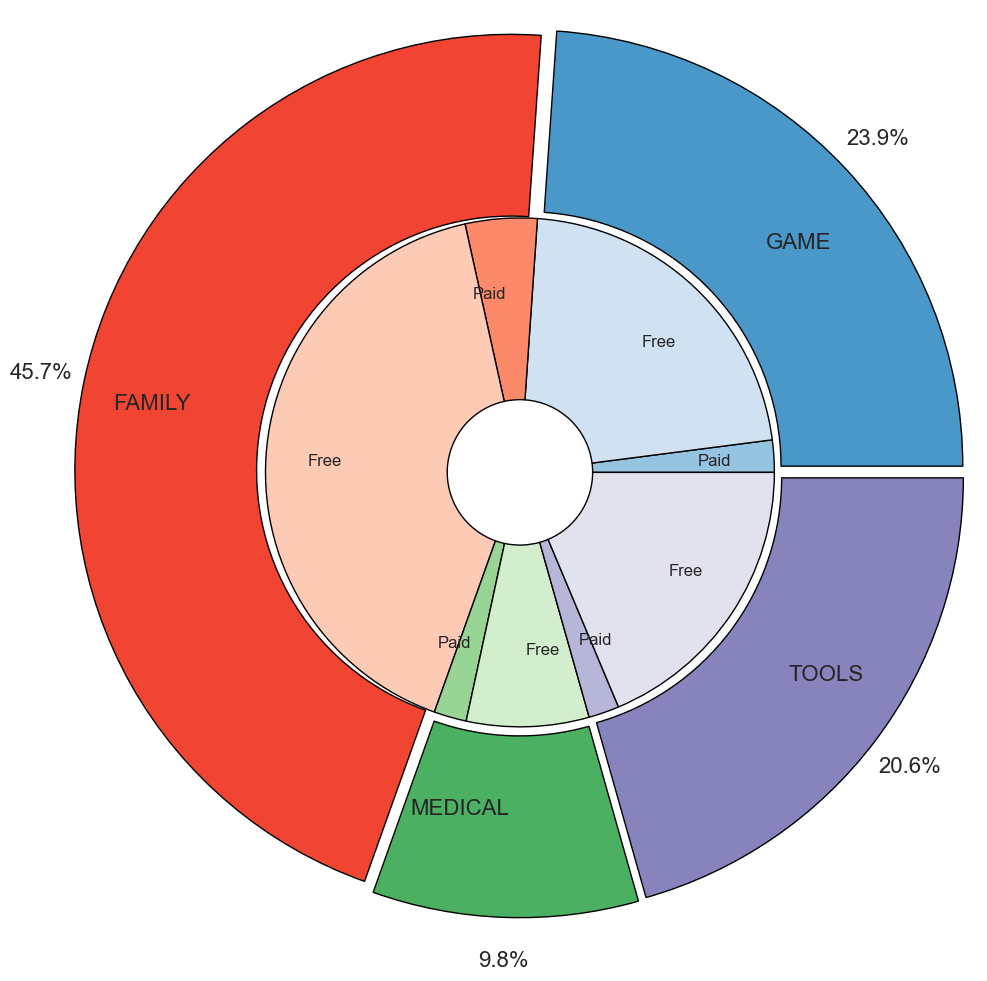

In [274]:
# Stacked bar graph for top 5-10 categories - Ratio of paid and free apps
#fig, ax = plt.subplots(figsize=(15,10))

new_df = df.groupby(['Category', 'Type']).agg({'App' : 'count'}).reset_index()
#print(new_df)

# outer_group_names = df['Category'].sort_values().value_counts()[:5].index
# outer_group_values = df['Category'].sort_values().value_counts()[:5].values

outer_group_names = ['GAME', 'FAMILY', 'MEDICAL', 'TOOLS']
outer_group_values = [len(df.App[df.Category == category]) for category in outer_group_names]

a, b, c, d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]


inner_group_names = ['Paid', 'Free'] * 4
inner_group_values = []
#inner_colors = ['#58a27c','#FFD433']


for category in outer_group_names:
    for t in ['Paid', 'Free']:
        x = new_df[new_df.Category == category]
        try:
            #print(x.App[x.Type == t].values[0])
            inner_group_values.append(int(x.App[x.Type == t].values[0]))
        except:
            #print(x.App[x.Type == t].values[0])
            inner_group_values.append(0)

explode = (0.025,0.025,0.025,0.025)
# First Ring (outside)
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('equal')
mypie, texts, _ = ax.pie(outer_group_values, radius=1.2, labels=outer_group_names, autopct='%1.1f%%', pctdistance=1.1,
                                 labeldistance= 0.75,  explode = explode, colors=[a(0.6), b(0.6), c(0.6), d(0.6)], textprops={'fontsize': 16})
plt.setp( mypie, width=0.5, edgecolor='black')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(inner_group_values, radius=1.2-0.5, labels=inner_group_names, labeldistance= 0.7, 
                   textprops={'fontsize': 12}, colors = [a(0.4), a(0.2), b(0.4), b(0.2), c(0.4), c(0.2), d(0.4), d(0.2)])
plt.setp( mypie2, width=0.5, edgecolor='black')
plt.margins(0,0)
 
# show it
plt.tight_layout()
plt.show()



#ax = sns.countplot(x="Category", hue="Type", data=new_df)

#df.groupby(['Category', 'Type']).count()['App'].unstack().plot(kind='bar', stacked=True, ax=ax)
#ylabel = plt.ylabel('Number of apps')



We have a stacked pie graph showing the distribution of paid and free apps across categories. I only take the top 4 categories with the highest frequency for examination.
It can be observed that the majority of apps released on the Google Play Store are free, with only a few requiring payment.


# Are paid apps downloaded as much as free apps?

In [275]:
trace0 = go.Box(
    y=np.log10(df['Installs'][df.Type=='Paid']),
    name = 'Paid',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )

)
trace1 = go.Box(
    y=np.log10(df['Installs'][df.Type=='Free']),
    name = 'Free',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
layout = go.Layout(
    title = "Number of downloads of paid apps Vs free apps",
    yaxis= {'title': 'Number of downloads (log-scaled)'}
)
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Paid apps have a relatively lower number of downloads than free apps. However, it is not too bad.

# How do the sizes of paid apps and free apps vary?

In [279]:
temp_df = df[df.Type == 'Paid']
temp_df = temp_df[temp_df.Size > 5]
#type_groups = df.groupby('Type')

data = [{
    #'x': type_groups.get_group(t)['Rating'], 
    'x' : temp_df['Rating'],
    'type':'scatter',
    'y' : temp_df['Size'],
    #'name' : t,
    'mode' : 'markers',
    #'showlegend': True,
    'text' : df['Size'],
    } for t in set(temp_df.Type)]


layout = {'title':"Rating vs Size", 
          'xaxis': {'title' : 'Rating'},
          'yaxis' : {'title' : 'Size (in MB)'},
         'plot_bgcolor': 'rgb(0,0,0)'}

plotly.offline.iplot({'data': data, 'layout': layout})

- Majority of the paid apps that are highly rated have small sizes. This means that most paid apps are designed and developed to cater to specific functionalities and hence are not bulky.
- It seems like Users prefer to pay for apps that are light-weighted. Thus, A paid app that is bulky may not perform well in the market. 


# Exploring Correlations

In [ ]:
#df['Installs'].corr(df['Reviews'])#df['Insta 
#print(np.corrcoef(l, rating))

corrmat = df.corr()
#f, ax = plt.subplots()
p =sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
df_copy = df.copy()

df_copy = df_copy[df_copy.Reviews > 10]
df_copy = df_copy[df_copy.Installs > 0]

df_copy['Installs'] = np.log10(df['Installs'])
df_copy['Reviews'] = np.log10(df['Reviews'])

sns.lmplot("Reviews", "Installs", data=df_copy)
ax = plt.gca()
_ = ax.set_title('Number of Reviews Vs Number of Downloads (Log scaled)')

A moderate positive correlation of 0.63 exists between the number of reviews and number of downloads.** This means that customers tend to download a given app more if it has been reviewed by a larger number of people. 


## Conclusion


1. The average rating of (active) apps on the Google Play Store is 4.17. This can be a target for developers to maintain or improve the quality of their apps.

2. Apps in the 'Family,' 'Game,' or 'Tools' categories face high competition in the market. Developers in these areas need to focus on improving quality to stand out.

3. Users prefer paying for lightweight apps. Therefore, developing a paid app with a large size may not be effective in the market.

4. Highly rated apps typically have optimal sizes, mostly ranging from ~2MB to ~40MB. This emphasizes the importance of optimizing the size of the app in development.

5. Stable pricing for apps is in the range of ~1$ to ~30$. This highlights the importance of determining an appropriate price point to attract users.

6. Categories like Medical and Family often have the highest prices, reaching up to $80. Developers in these categories need to carefully consider their pricing strategy.

7. Users tend to download apps that have been reviewed by a large number of people. This poses both a challenge and an opportunity for new developers to enhance their marketing strategy and attract reviews from users.
